In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append('../../')
from methods.prior_estimation import *
from methods.production_functions import *

In [10]:
df = pd.read_csv('example_te_data.csv')
observed_effects = df.treatment_effects
standard_errors = df.standard_errors

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,
         2.,  1.,  5., 12., 27., 32., 60., 70., 60., 28., 16.,  4.,  5.,
         3.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.]),
 array([-0.29206824, -0.2776686 , -0.26326896, -0.24886931, -0.23446967,
        -0.22007002, -0.20567038, -0.19127073, -0.17687109, -0.16247145,
        -0.1480718 , -0.13367216, -0.11927251, -0.10487287, -0.09047323,
        -0.07607358, -0.06167394, -0.04727429, -0.03287465, -0.018475  ,
        -0.00407536,  0.01032428,  0.02472393,  0.03912357,  0.05352322,
         0.06792286,  0.0823225 ,  0.09672215,  0.11112179,  0.12552144,
         0.13992108,  0.15432072,  0.16872037,  0.18312001,  0.19751966,
         0.2119193 ,  0.22631895,  0.24071859,  0.25511823,  0.26951788,
         0.28391752]),
 <BarContainer object of 40 artists>)

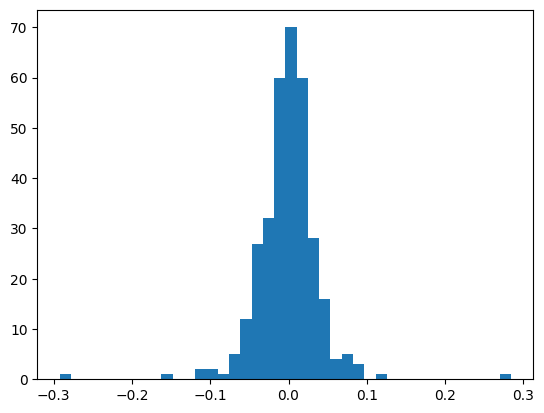

In [15]:
plt.hist(observed_effects, bins = 40)

## Parametric Normal Model

In [16]:
normal_eb_estimates, mu, tau = empirical_bayes_normal(observed_effects, standard_errors)
print(mu)
print(tau)

-0.00037565460231478974
0.03397515937521398


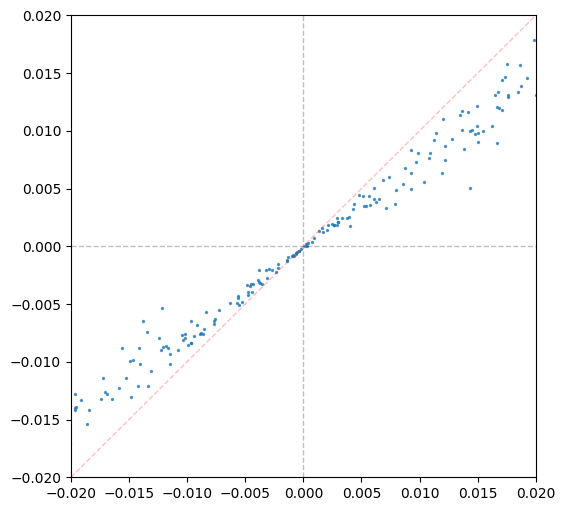

In [12]:
plt.figure(figsize = (6,6))
plt.scatter(observed_effects, normal_eb_estimates, s = 2, alpha = 0.7)

plt.xlim(-0.02,0.02)
plt.ylim(-0.02,0.02)

plt.plot(np.linspace(-0.02,0.02,100), np.linspace(-0.02,0.02,100),
          color = 'red', linestyle = 'dashed', linewidth = 1, alpha = 0.25)

plt.axhline(0, linewidth = 1, color = 'black', linestyle = 'dashed', alpha = 0.25)
plt.axvline(0, linewidth = 1, color = 'black', linestyle = 'dashed', alpha = 0.25)

## Nonparametric EB

In [86]:
shrunk_estimates, m = empirical_bayes_npmle(observed_effects, standard_errors)

Selecting all data points as atoms: done.
Computing kernel matrix: done.
Solving for discretized NPMLE: done.


Text(0.5, 0, 'Shrunken Estimates')

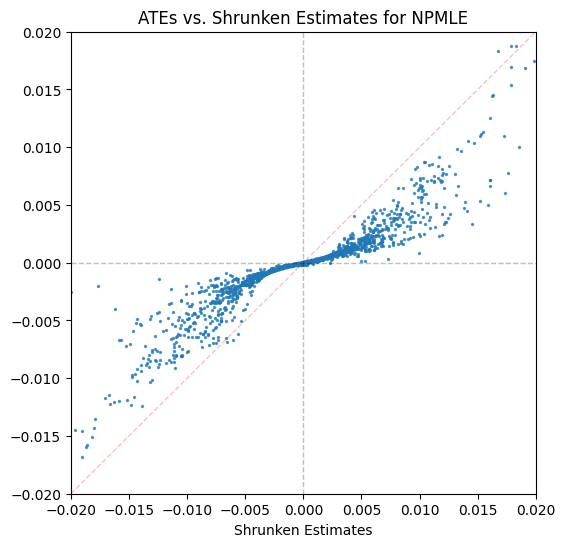

In [89]:
plt.figure(figsize = (6,6))
plt.scatter(observed_effects, shrunk_estimates, s = 2 , alpha = 0.7)

plt.xlim(-0.02,0.02)
plt.ylim(-0.02,0.02)
plt.plot(np.linspace(-0.02,0.02,100), np.linspace(-0.02,0.02,100),
          color = 'red', linestyle = 'dashed', linewidth = 1, alpha = 0.25)


plt.axhline(0, linewidth = 1, color = 'black', linestyle = 'dashed', alpha = 0.25)
plt.axvline(0, linewidth = 1, color = 'black', linestyle = 'dashed', alpha = 0.25)

plt.title("ATEs vs. Shrunken Estimates for NPMLE")
plt.xlabel("ATEs")
plt.xlabel("Shrunken Estimates")

In [92]:
import numpy as np

def summarize_array(arr):
    summary = {}
    summary['median'] = np.median(arr)
    summary['mean'] = np.mean(arr)
    summary['range'] = np.ptp(arr)  
    summary['std_dev'] = np.std(arr)
    summary['min'] = np.min(arr)
    summary['max'] = np.max(arr)
    
    return summary

summarize_array(weights)

{'median': np.float64(3.363994100016999e-12),
 'mean': np.float64(0.000566251415628539),
 'range': np.float64(0.6519751612704195),
 'std_dev': np.float64(0.01608541961374699),
 'min': np.float64(3.649314119429446e-15),
 'max': np.float64(0.6519751612704232)}

In [93]:
sorted_weights = np.sort(weights)
cumulative_weights = sorted_weights.cumsum()

idx = np.searchsorted(cumulative_weights, 0.0001) # remove bottom atoms which contribute 1% of total mass, for visualization purposes

cutoff = sorted_weights[idx]
print(cutoff)

0.0005624405813314884


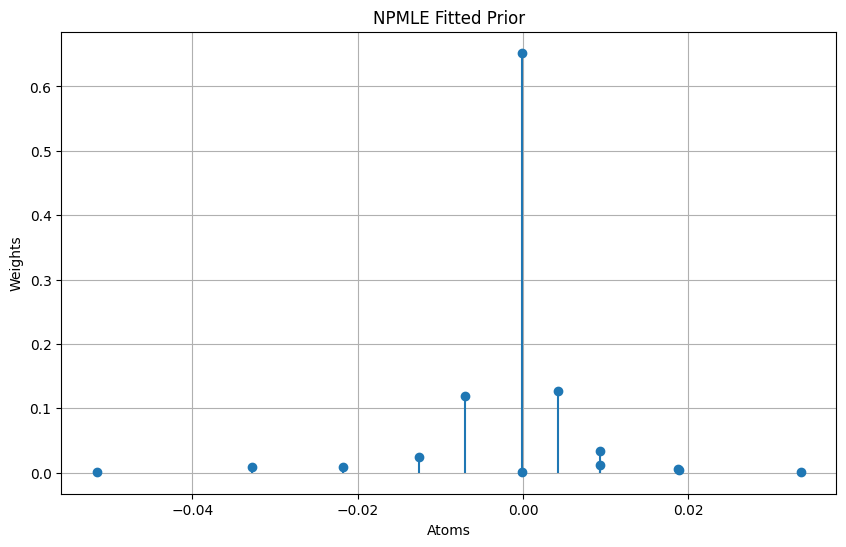

In [94]:
def plot_distribution(atoms, weights):
    # Normalize weights to make sure they sum up to 1
    weights = weights / np.sum(weights)
    
    plt.figure(figsize=(10, 6))
    plt.stem(atoms, weights, basefmt=" ")
    plt.xlabel('Atoms')
    plt.ylabel('Weights')
    plt.title('NPMLE Fitted Prior')
    plt.grid(True)
    plt.show()

mask = (weights > cutoff)
plot_distribution(atoms[mask], weights[mask])

In [50]:
npeb_prior = (atoms[mask], weights[mask])

In [51]:
ns = np.linspace(1_000,250_000_000, 500)
prod_fcn_vals = np.zeros_like(ns)
sigma = 9.

for i in range(len(ns)):
    prod_fcn_vals[i] = evaluate_production_function(ns[i], npeb_prior, sigma, 1_000_000)


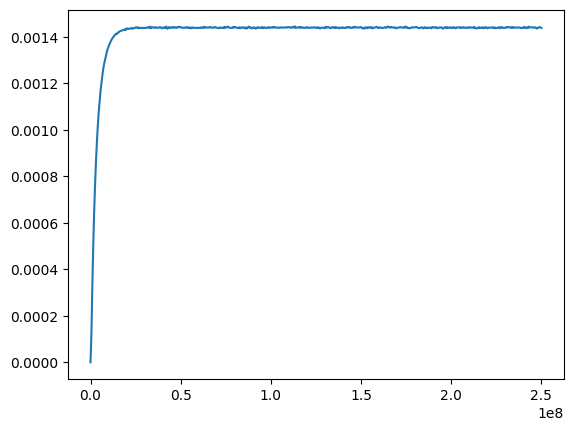

In [52]:
plt.plot(ns, prod_fcn_vals)